In [10]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1953/1953 [==============================] - 59s 28ms/step - loss: 0.0016


In [11]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , : ]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [12]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [13]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 17ms/step


In [15]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

2.1419277323880204

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


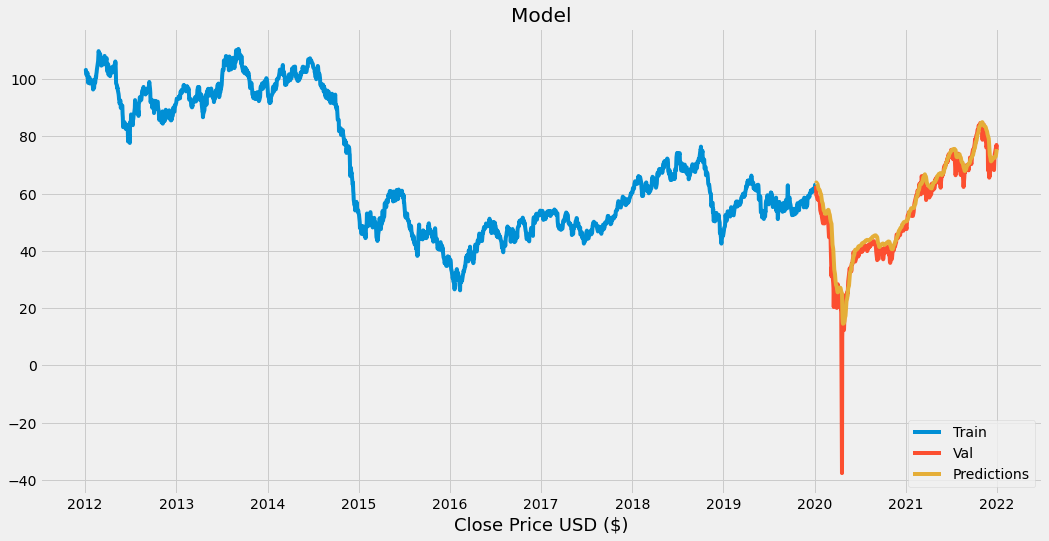

In [16]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize= 18)
plt.xlabel('Close Price USD ($)', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
#Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2020-01-07,62.700001,63.667931
2020-01-08,59.610001,63.898209
2020-01-09,59.560001,63.838909
2020-01-10,59.040001,63.625164
2020-01-13,58.080002,63.298794
...,...,...
2021-12-27,75.570000,72.948570
2021-12-28,75.980003,73.488892
2021-12-29,76.559998,74.137222


In [18]:
#Get the quote 
apple_quote = web.DataReader('CL=F', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test= []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 24ms/step
[[61.320602]]


In [19]:
#Get the quote
apple_quote2 = web.DataReader('CL=F', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    60.93
Name: Close, dtype: float64
